# EN3160 Assignment 2 on Fitting and Alignment

Index: 210580M

Name: Saumyajith S.A.D.P.

1

Blob Detection with Reporting Parameters of the Largest Circle

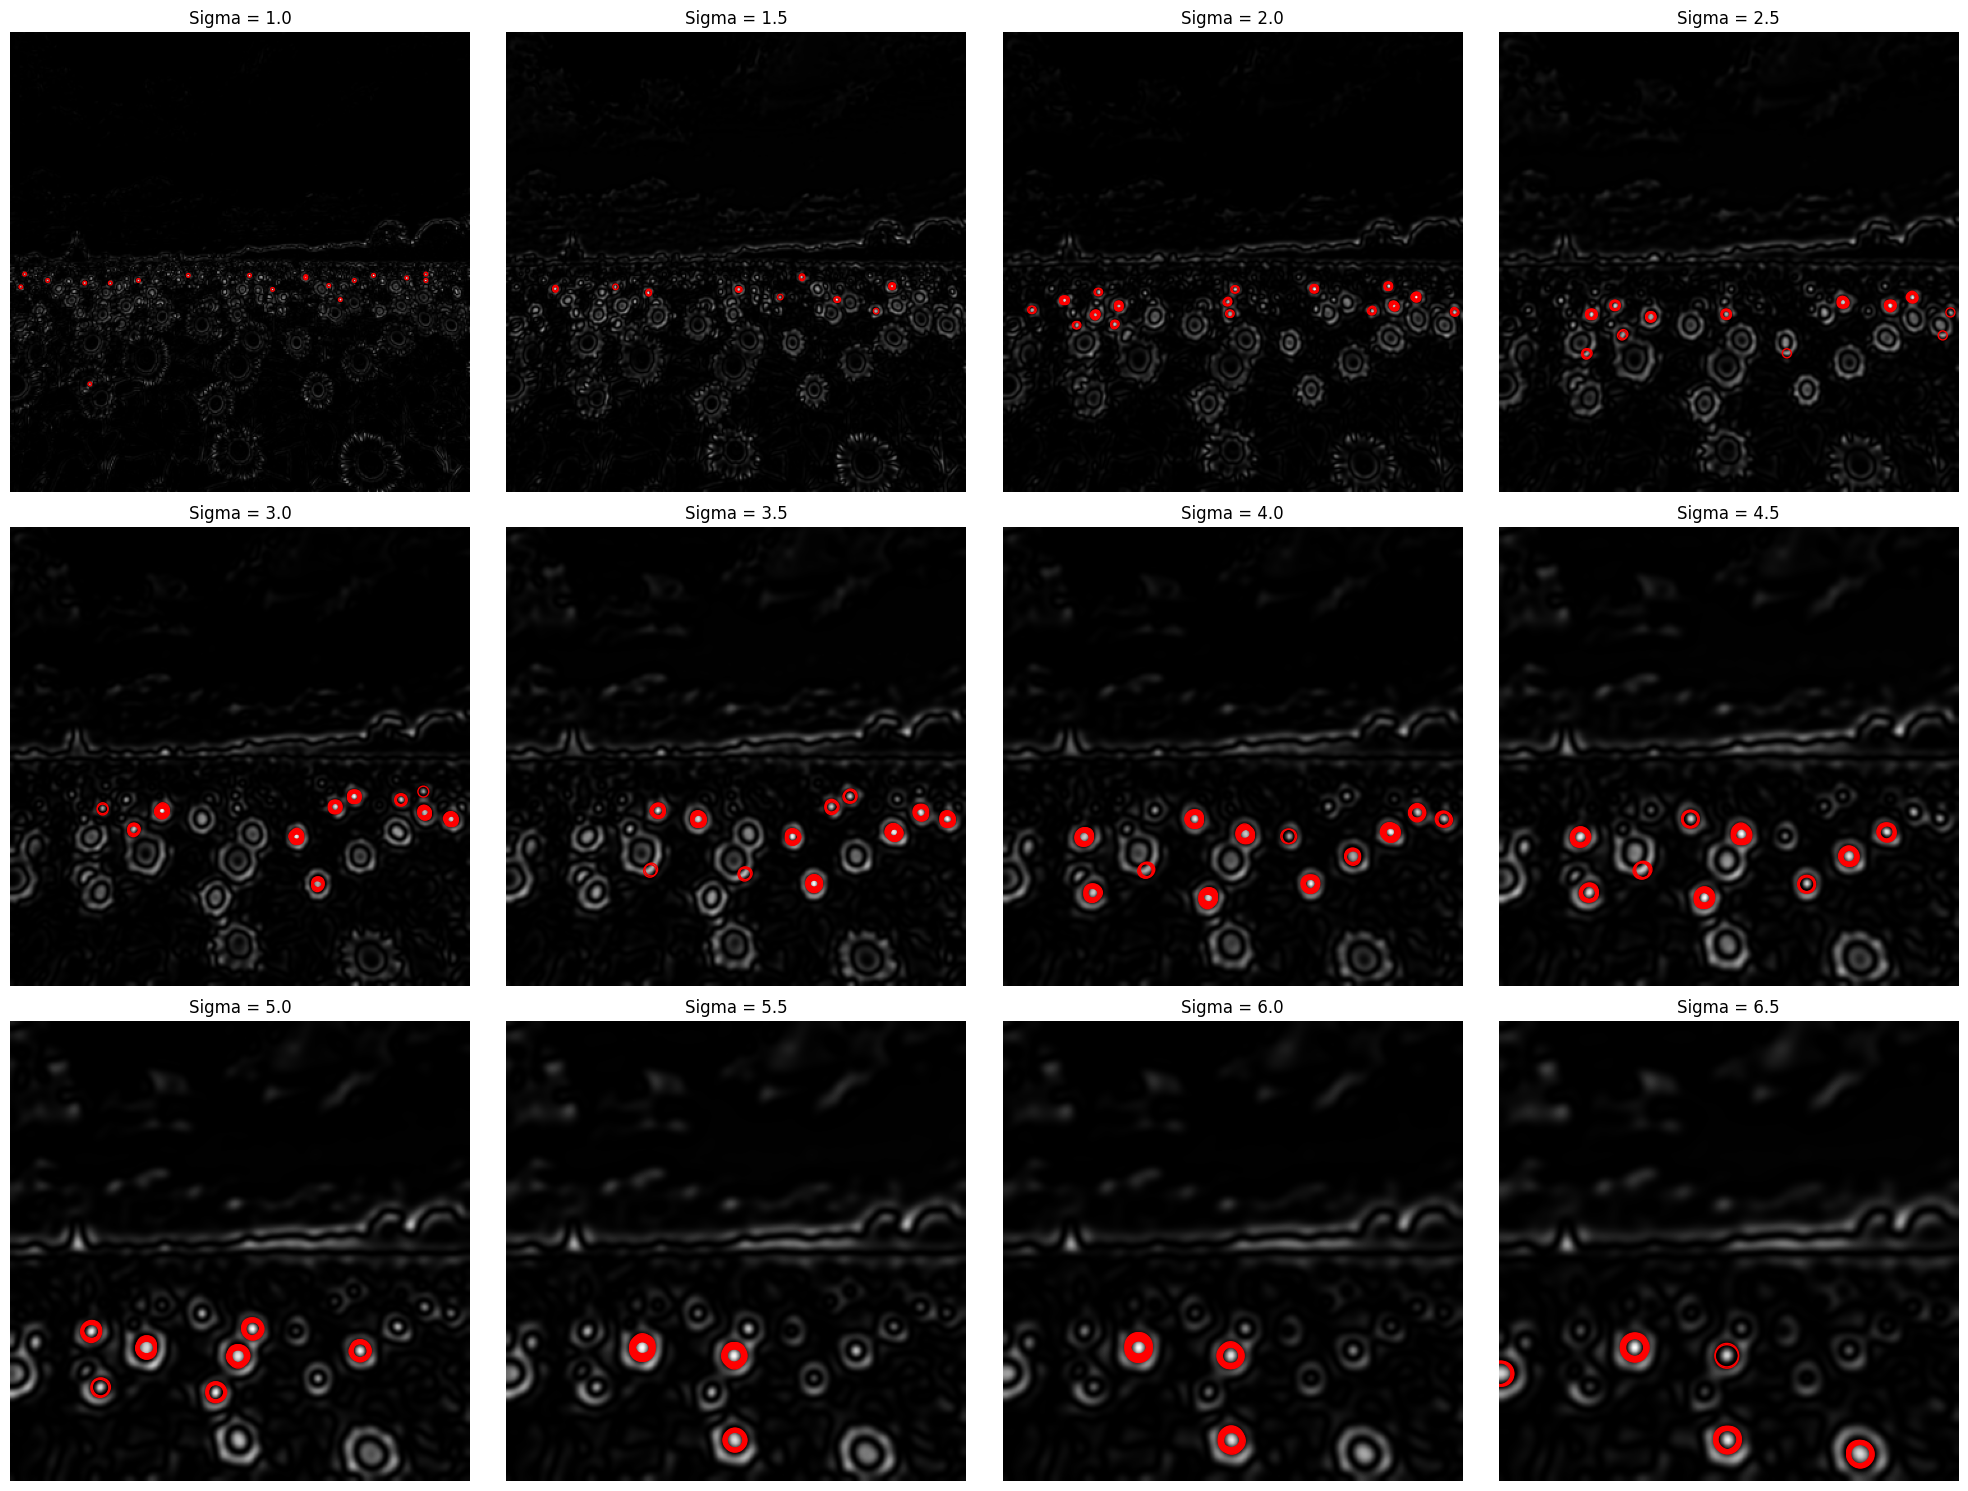

Largest Circle Parameters:
Sigma: 6.50, Coordinates: (276.00, 1.00), Radius: 9.19
Range of σ values used: 1.0 to 10.0


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Function to generate Laplacian of Gaussian (LoG) kernel
def LoG(sigma):
    hw = int(3 * sigma)  # Half-width of the kernel
    x = np.linspace(-hw, hw, 2 * hw + 1)  # Create x coordinates
    y = np.linspace(-hw, hw, 2 * hw + 1)  # Create y coordinates
    X, Y = np.meshgrid(x, y)
    log = ((X**2 + Y**2) / (2 * sigma**2) - 1) * np.exp(-(X**2 + Y**2) / (2 * sigma**2)) / (np.pi * sigma**4)
    return log

# Function to detect maxima in the filtered image
def detect_max(filtered_image, threshold):
    coordinates = []
    height, width = filtered_image.shape
    k = 1
    for i in range(k, height - k):
        for j in range(k, width - k):
            neighborhood = filtered_image[i - k:i + k + 1, j - k:j + k + 1]
            max_value = np.max(neighborhood)
            if max_value >= threshold:
                max_pos = np.unravel_index(neighborhood.argmax(), neighborhood.shape)
                coordinates.append((i + max_pos[0] - k, j + max_pos[1] - k))  # Store coordinates of maxima
    return set(coordinates)

# Load the sunflower field image
image_path = Path('C:\\Users\\spram\\Downloads\\New folder\\the_berry_farms_sunflower_field.jpeg')
image = cv.imread(str(image_path), flags=cv.IMREAD_REDUCED_COLOR_4)

if image is None:
    print("Failed to load the image. Please verify the path.")
    exit()

# Convert the image to grayscale and normalize
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) / 255.0  # Normalize to [0, 1]

# Create sigma values from 1 to 10 with a step of 0.5
sigma_values = np.arange(1.0, 10.5, 0.5)

# Prepare a list to keep track of detected circle parameters
circle_parameters = []

# Set up the plot for displaying results
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Iterate through each sigma value
for idx, ax in enumerate(axes.flatten()):
    if idx < len(sigma_values):  # Ensure we stay within the bounds of sigma_values
        sigma_value = sigma_values[idx]
        LOG = sigma_value**2 * LoG(sigma_value)  # Generate LoG kernel

        # Apply the LoG filter to the grayscale image
        filtered_image = np.square(cv.filter2D(src=image_gray, ddepth=-1, kernel=LOG))

        # Detect maxima in the filtered image
        coordinates = detect_max(filtered_image, threshold=0.09)

        # Store parameters of detected circles
        for x, y in coordinates:
            circle_radius = sigma_value * np.sqrt(2)  # Circle radius based on sigma
            circle_parameters.append((sigma_value, x, y, circle_radius))  # (sigma, x, y, radius)

        # Display the filtered image
        ax.imshow(filtered_image, cmap='gray')
        ax.set_title(f'Sigma = {sigma_value:.1f}')
        ax.axis('off')

        # Draw circles around detected maxima
        for x, y in coordinates:
            circle_radius = sigma_value * np.sqrt(2)  # Circle radius based on sigma
            circle = plt.Circle((y, x), circle_radius, color='red', linewidth=1, fill=False)
            ax.add_patch(circle)  # Add circle to the axes

plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plots

# Report the parameters of the largest circles
if circle_parameters:
    largest_circle = max(circle_parameters, key=lambda c: c[3])  # Get the circle with the largest radius
    print("Largest Circle Parameters:")
    print(f"Sigma: {largest_circle[0]:.2f}, Coordinates: ({largest_circle[1]:.2f}, {largest_circle[2]:.2f}), Radius: {largest_circle[3]:.2f}")

# Report the range of σ values used
print(f"Range of σ values used: {sigma_values[0]} to {sigma_values[-1]}")


C:\Users\spram\AppData\Local\Temp\ipykernel_23268\3840022695.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(sigma_values))  # Use a colormap with enough colors


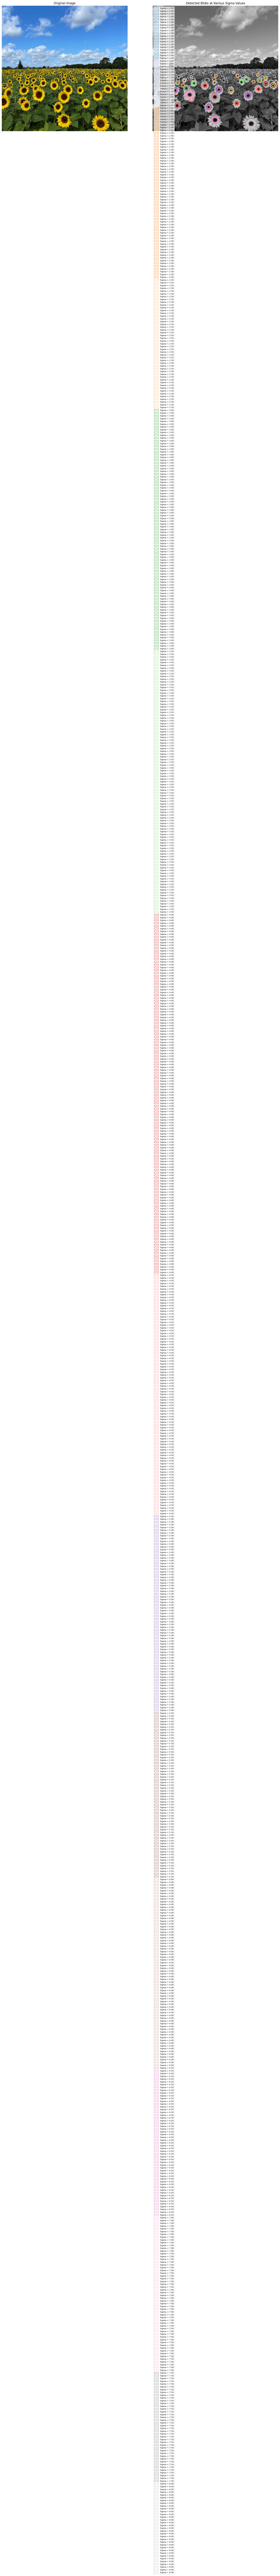

Largest Circle Parameters:
Sigma: 8.00, Coordinates: (276.00, 1.00), Radius: 11.31
Range of σ values used: 1.0 to 10.0


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Function to create a Laplacian of Gaussian (LoG) kernel
def create_log_kernel(sigma):
    hw = int(3 * sigma)  # Half width of the kernel
    x = np.linspace(-hw, hw, 2 * hw + 1)  # X coordinates
    y = np.linspace(-hw, hw, 2 * hw + 1)  # Y coordinates
    X, Y = np.meshgrid(x, y)
    log_kernel = ((X**2 + Y**2) / (2 * sigma**2) - 1) * np.exp(-(X**2 + Y**2) / (2 * sigma**2)) / (np.pi * sigma**4)
    return log_kernel

# Function to find maxima in the filtered image
def find_maxima(filtered_image, threshold):
    maxima_coordinates = []
    height, width = filtered_image.shape
    offset = 1  # Offset for neighborhood checking
    for i in range(offset, height - offset):
        for j in range(offset, width - offset):
            local_region = filtered_image[i - offset:i + offset + 1, j - offset:j + offset + 1]
            max_value = np.max(local_region)
            if max_value >= threshold:
                max_position = np.unravel_index(local_region.argmax(), local_region.shape)
                maxima_coordinates.append((i + max_position[0] - offset, j + max_position[1] - offset))
    return set(maxima_coordinates)

# Load the sunflower field image
image_path = Path('C:\\Users\\spram\\Downloads\\New folder\\the_berry_farms_sunflower_field.jpeg')
sunflower_image = cv.imread(str(image_path), flags=cv.IMREAD_REDUCED_COLOR_4)

if sunflower_image is None:
    print("Image loading failed. Please check the file path.")
    exit()

# Convert the image to grayscale and normalize the pixel values
gray_image = cv.cvtColor(sunflower_image, cv.COLOR_BGR2GRAY) / 255.0  # Normalize to [0, 1]

# Generate sigma values from 1.0 to 10.0 with an interval of 0.5
sigma_values = np.arange(1.0, 10.5, 0.5)

# Prepare a list to keep track of detected circle parameters
circle_parameters = []

# Set up the plot for the original and processed images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Display the original image
axes[0].imshow(cv.cvtColor(sunflower_image, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

# Prepare the second subplot for the detected blobs
detected_ax = axes[1]
detected_ax.imshow(gray_image, cmap='gray')
detected_ax.grid(False)

# Define a list of colors for the circles (at least 20 colors)
colors = plt.cm.get_cmap('tab20', len(sigma_values))  # Use a colormap with enough colors

# Lists to store circle patches and their labels for the legend
circle_patches = []
circle_labels = []

# Loop over the defined sigma values to detect blobs
for i, sigma in enumerate(sigma_values):
    log_kernel = sigma**2 * create_log_kernel(sigma)  # Generate LoG kernel
    filtered_image = np.square(cv.filter2D(gray_image, ddepth=-1, kernel=log_kernel))  # Filter the image
    
    # Detect maxima in the filtered image
    blob_coordinates = find_maxima(filtered_image, threshold=0.09)

    # Draw circles around detected blobs and store their parameters
    for x, y in blob_coordinates:
        circle_radius = sigma * np.sqrt(2)  # Circle radius based on sigma
        circle = plt.Circle((y, x), circle_radius, color=colors(i), linewidth=1, fill=False)
        detected_ax.add_patch(circle)  # Add circle to the axes
        circle_patches.append(circle)  # Store the circle patch for the legend
        circle_labels.append(f'Sigma = {sigma:.2f}')  # Add label for legend
        circle_parameters.append((sigma, x, y, circle_radius))  # Store circle parameters

# Set limits and titles for the detected ax
detected_ax.set_xlim(0, gray_image.shape[1])
detected_ax.axis('off')  # Turn off axis for the second plot

# Add a legend to the second subplot
detected_ax.legend(circle_patches, circle_labels, loc='best', fontsize=8)
detected_ax.set_title("Detected Blobs at Various Sigma Values")

# Show the combined plot
plt.show()

# Report the parameters of the largest circles
if circle_parameters:
    largest_circle = max(circle_parameters, key=lambda c: c[3])  # Get the circle with the largest radius
    print("Largest Circle Parameters:")
    print(f"Sigma: {largest_circle[0]:.2f}, Coordinates: ({largest_circle[1]:.2f}, {largest_circle[2]:.2f}), Radius: {largest_circle[3]:.2f}")

# Report the range of σ values used
print(f"Range of σ values used: {sigma_values[0]} to {sigma_values[-1]}")


# 2

Import Libraries and Generate Noisy Points

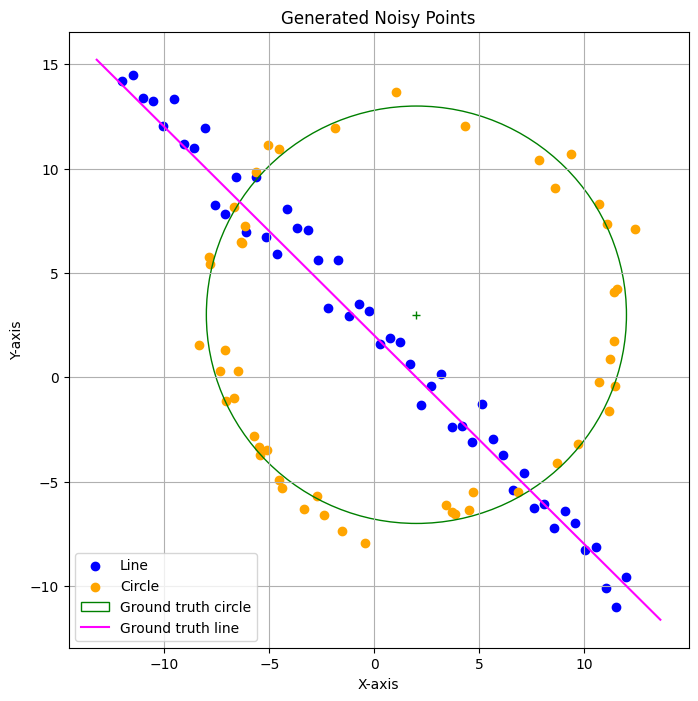

In [3]:
# Section 1: Generation of a Noisy Point Set Conforming to a Line and a Circle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set random seed
np.random.seed(0)

# Constants
N = 100
half_n = N // 2

# Circle parameters
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Line parameters
s, m, b = 1, -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine points
X = np.vstack((X_circ, X_line))  # All points

# Plotting the generated points
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line', color='blue')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle', color='orange')

# Ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='green', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='green')

# Ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='magenta', label='Ground truth line')

plt.legend()
plt.title('Generated Noisy Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()


Line RANSAC Implementation

In [4]:
# Section 2: Line RANSAC Implementation
def line_tls(x, indices, X):
    a, b, d = x[0], x[1], x[2]
    return np.sum(np.square(a * X[indices, 0] + b * X[indices, 1] - d))

def consensus_line(X, x, t):
    a, b, d = x[0], x[1], x[2]
    error = np.abs(a * X[:, 0] + b * X[:, 1] - d)
    return error < t

# Constraint: normalize the line parameters
def g(x):
    return x[0]**2 + x[1]**2 - 1

cons = ({'type': 'eq', 'fun': g})

# RANSAC parameters
N = X_line.shape[0]
X_ = X_line
t = 0.8  # Threshold for inlier determination
d = 0.4 * N  # Minimum number of close points required
s = 2  # Minimum points to estimate the model

inliers_line = []
max_iterations = 100
iteration = 0
best_model_line = []
best_error = np.inf
best_sample_line = []
res_only_with_sample = []
best_inliers_line = []

while iteration < max_iterations:
    indices = np.random.randint(0, N, s)  # Random sample of points
    x0 = np.array([1, 1, 0])  # Initial estimate
    res = minimize(fun=line_tls, args=(indices, X_), x0=x0, tol=1e-6, constraints=cons, options={'disp': False})
    
    inliers_line = consensus_line(X_, res.x, t)  # Compute inliers
    
    print(f'rex.x: {res.x}')
    print(f'Iteration = {iteration}. No. inliers = {inliers_line.sum()}')
    
    if inliers_line.sum() > d:
        x0 = res.x
        res = minimize(fun=line_tls, args=(inliers_line, X_), x0=x0, tol=1e-6, constraints=cons, options={'disp': False})
        
        if res.fun < best_error:
            best_model_line = res.x
            best_error = res.fun
            best_sample_line = X_[indices, :]
            res_only_with_sample = x0
            best_inliers_line = inliers_line
            
    iteration += 1

print('Best line model:', best_model_line)


rex.x: [0.73374795 0.67942178 1.26682119]
Iteration = 0. No. inliers = 33
rex.x: [0.85776249 0.51404623 3.7463851 ]
Iteration = 1. No. inliers = 11
rex.x: [-0.88008363  0.4748187  -2.55869419]
Iteration = 2. No. inliers = 3
rex.x: [0.67898066 0.73415627 1.12875165]
Iteration = 3. No. inliers = 27
rex.x: [0.20529265 0.97870063 6.24746846]
Iteration = 4. No. inliers = 6
rex.x: [0.72545376 0.68827091 0.70180677]
Iteration = 5. No. inliers = 23
rex.x: [ 0.02713196  0.99963186 13.07284376]
Iteration = 6. No. inliers = 3
rex.x: [0.6567609  0.75409937 1.21981749]
Iteration = 7. No. inliers = 23
rex.x: [0.70328713 0.71090646 1.75937847]
Iteration = 8. No. inliers = 31
rex.x: [0.7697257  0.63837491 2.02639944]
Iteration = 9. No. inliers = 27
rex.x: [0.75614667 0.6544023  2.384347  ]
Iteration = 10. No. inliers = 28
rex.x: [0.71793199 0.69611381 1.92292337]
Iteration = 11. No. inliers = 37
rex.x: [0.65008383 0.75986299 1.45085152]
Iteration = 12. No. inliers = 23
rex.x: [0.59936592 0.80047517 3.

Circle RANSAC Implementation

In [5]:
# Section 3: Circle RANSAC Implementation
def dist_circle(params, X, indices):
    xc, yc, r = params
    return np.sum(np.square(np.sqrt((X[indices, 0] - xc)**2 + (X[indices, 1] - yc)**2) - r))

def consensus_circle(X, params, t):
    xc, yc, r = params
    error = np.abs(np.sqrt((X[:, 0] - xc)**2 + (X[:, 1] - yc)**2) - r)
    return error < t

t = 1.2  # Allowable distance error for circle inliers
d = 0.4 * N  # Minimum points required for circle
s = 3  # Minimum points to estimate circle

N = X_circ.shape[0]
X_ = X_circ

inliers_circle = []
max_iterations = 200
iteration = 0
best_model_circle = []
best_error = np.inf
best_sample_circle = []
best_inliers_circle = []

while iteration < max_iterations:
    indices = np.random.randint(0, N, s)  # Randomly select 3 points
    x0 = np.array([x0_gt, y0_gt, 1])  # Initial guess for circle
    res = minimize(fun=dist_circle, args=(X_, indices), x0=x0, tol=1e-6, options={'disp': False})
    
    inliers_circle = consensus_circle(X_, res.x, t)  # Determine inliers
    
    if inliers_circle.sum() > d:
        x0 = res.x
        res = minimize(fun=dist_circle, args=(X_, inliers_circle), x0=x0, tol=1e-6, options={'disp': False})
        
        if res.fun < best_error:
            best_model_circle = res.x
            best_error = res.fun
            best_sample_circle = X_[indices, :]
            best_inliers_circle = inliers_circle
            
    print(f'Iteration = {iteration}. No. inliers = {inliers_circle.sum()}')
    print(f'Optimization terminated successfully (Exit mode {res.status})')
    print(f'Current function value: {res.fun}')
    print(f'Parameters: xc = {res.x[0]}, yc = {res.x[1]}, r = {res.x[2]}')
    
    iteration += 1

print('Best circle model:', best_model_circle)


Iteration = 0. No. inliers = 11
Optimization terminated successfully (Exit mode 0)
Current function value: 2.751605442717117e-13
Parameters: xc = -2.654153585017321, yc = 0.39873245898378507, r = 4.689031927796288
Iteration = 1. No. inliers = 25
Optimization terminated successfully (Exit mode 0)
Current function value: 3.40157617945503
Parameters: xc = 5.000072574105147, yc = 3.2411501668014884, r = 12.410060583509768
Iteration = 2. No. inliers = 29
Optimization terminated successfully (Exit mode 0)
Current function value: 4.012072786989767
Parameters: xc = 2.3117348375241735, yc = 2.125786467457914, r = 9.720685904697275
Iteration = 3. No. inliers = 18
Optimization terminated successfully (Exit mode 2)
Current function value: 6.569663182071959e-12
Parameters: xc = 16.1441960326244, yc = 4.082001468172936, r = 22.576060743934818
Iteration = 4. No. inliers = 45
Optimization terminated successfully (Exit mode 0)
Current function value: 10.183091577487446
Parameters: xc = 1.93975623577570

Visualization

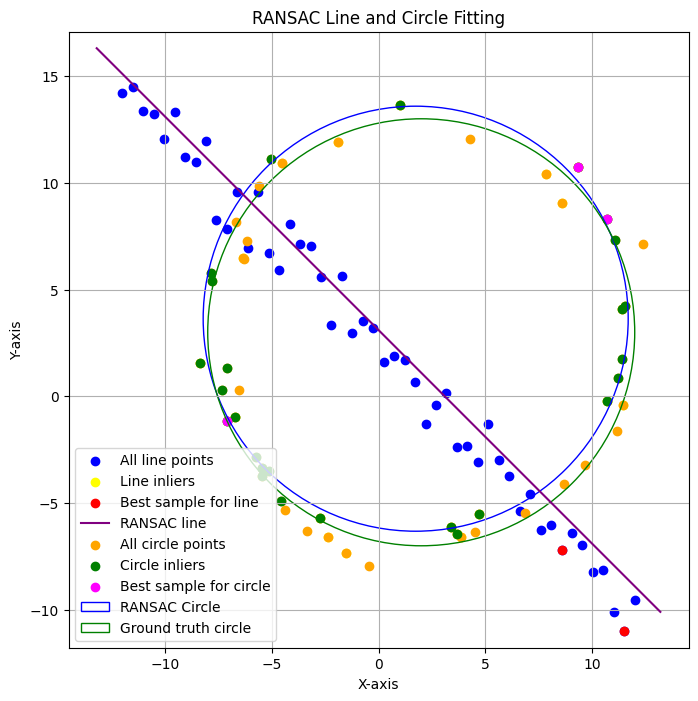

In [6]:
# Section 4: Plotting Results
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot all line points and their inliers
ax.scatter(X_line[:, 0], X_line[:, 1], label='All line points', color='blue')
ax.scatter(X_[best_inliers_line, 0], X_[best_inliers_line, 1], color='yellow', label='Line inliers')
ax.scatter(best_sample_line[:, 0], best_sample_line[:, 1], color='red', label='Best sample for line')

# Plot RANSAC line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1] * x_ + best_model_line[2]) / best_model_line[1]
plt.plot(x_, y_, label='RANSAC line', color='purple')

# Plot all circle points and their inliers
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='All circle points', color='orange')
ax.scatter(X_[best_inliers_circle, 0], X_[best_inliers_circle, 1], color='green', label='Circle inliers')
ax.scatter(best_sample_circle[:, 0], best_sample_circle[:, 1], color='magenta', label='Best sample for circle')

# Plot RANSAC circle and ground truth
circle_ransac = plt.Circle((best_model_circle[0], best_model_circle[1]), best_model_circle[2], color='blue', fill=False, label='RANSAC Circle')
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='green', fill=False, label='Ground truth circle')
ax.add_artist(circle_ransac)
ax.add_artist(circle_gt)

plt.legend()
plt.title('RANSAC Line and Circle Fitting')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axis('equal')
plt.show()


If we fit the circle first, the influence of the line points can distort the circle's center and radius, leading to an inaccurate fit. This poor circle fit can misclassify line points as inliers, negatively affecting the subsequent line fitting process.